# Demonstration des Shors Algorithmus zum Brechen des DLP

Dieses Notebook benötigt das Jupyter-Python-3-Kernel

Dieses Notebook erläutert die Funktionsweise des Shor's Algorithmus. Zudem wird eine Quantencomputersimulation durchgeführt, die den Shor's Algorithmus implementiert.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
from fractions import Fraction
import pandas as pd

## Der Shors Algorithmus

Wie in der Arbeit "QrTOR - Modernes quantenresistentes Onion Routing" beschrieben, stellt der Shors Algorithmus die größte kryptographische Gefahr für asymmetrische Kryptosysteme dar. In diesem Notebook wird dieser Algorithmus erklärt und auf ein einfaches Beispiel angewandt. Um den Inhalt dieses Notebook nachvollziehen zu können, werden Kenntnisse der Quanteninformationstheorie sowie der linearen Algebra benötigt. Auch wird der Quantenphasenschätzungsalgorithmus verwendet, der in diesem Notebook nicht erklärt wird.

Im Kern des Shors Algorithmus steht die Lösung des "Period-Finding-Problem" in subexponentieller Komplexität. Das Period-Finding-Problem lautet wie folgt: 
Gegeben sind die diskrete periodische Funktion $f(x)$ wobei für jedes Element $x$ ein Element $p$ existiert, sodass gilt: $f(x) = f(x + p)$

Der Shor's Algorithmus berechnet nun zu einer gegebenen periodischen Funktion $f$ und einem Element $x$ die Periode $p$ des Elements $x$ in Bezug auf $f$ 
Es kann gezeigt werden, dass sich sämtliche kryptographische Probleme auf das "Period-Finding-Problem" reduzieren lassen. 
Daher sind beipielsweise der RSA, Diffie-Hellman und der Diffie-Hellman auf Basis elliptischer Kurven nicht quantensicher, da deren mathematische Probleme auf das "Period-Finding-Problem" reduziert und damit durch den Shor's Algorithmus gelöst werden können. 
Die Zeitkomplexität des Shor's Algorithmus beträgt dabei $O(poly(log(n)))$

## Der Quantencomputer

Wir nehmen an, dass wir einen fehlertoleranten Quantencomputer mit einem Qubit-Register von $2^N$ Qubits zu Verfügung haben. _[1]_ $$\underbrace{q_0 \otimes q_1 \otimes q_2 \otimes \cdots \otimes q_{2^N}}_{Qubit-Register}$$

Wie in der Quanteninformationstheorie üblich, wird jedes einzelne Qubit durch einen Zustandsvektor folgender Form dargestellt: $$q_n = \begin{pmatrix}a_n\\b_n\end{pmatrix}$$  Die Einträge des Vektors sind dabei komplexe Zahlen _[1]_.

Um nun Zahlen in einem Quantenregister darzustellen, verwenden wir die gleiche Binärcodierung wie in der klassischen Informationstheorie. So würde zum Beispiel die Zahl $3$ in einem $2$-Qubitregister folgendermaßen dargestellt werden: $$| 3 \rangle = |11\rangle$$ \
Der Zustandsverktor des gesammten $2$-Qubitregisters wäre also: $$state = \begin{pmatrix} amp_{| 00 \rangle}\\amp_{| 01 \rangle}\\amp_{| 10 \rangle}\\amp_{| 11 \rangle} \end{pmatrix} = \begin{pmatrix} amp_{| 0 \rangle}\\ amp_{| 1 \rangle} \\ amp{| 2 \rangle} \\ amp{| 3 \rangle} \end{pmatrix}$$

Die Wahrscheinlichkeit das Quantenregister nach einer Messung im Zustand $| 3 \rangle$ vorzufinden, wäre also durch $p(| 3 \rangle) = |amp_{| 11 \rangle}|^2$ gegeben

## Die Kernidee des Shors Algorithmus

Wir versuchen nun das Diskrete Logarithmus Problem mit unserem Quantencomputer zu lösen. Dafür definieren wir den unitären Operator, der die Modularmultiplikation durchführt: $$U^r|y \rangle = |y^r \ mod N \rangle$$ 
Ein einfaches Beispiel mit $ N = 9 \ ; \ y = 2$: 
$$U^1|2 \rangle = |2 * 2 \ mod 9 \rangle = |4 \rangle$$ 
$$U^2|1 \rangle = |4 * 2 \ mod 9 \rangle = |8 \rangle$$ 
$$U^3|1 \rangle = |8 * 2 \ mod 9 \rangle = |7 \rangle$$ 
$$U^4|1 \rangle = |7 * 2 \ mod 9 \rangle = |5 \rangle$$ 
$$U^5|1 \rangle = |5 * 2 \ mod 9 \rangle = |1 \rangle$$
$$U^6|1 \rangle = |1 * 2 \ mod 9 \rangle = |2 \rangle$$
Die Menge $M = \{ 4, 8, 7, 5, 1, 2\}$ spannen also die zyklische Gruppe von $y = 2$ auf

Nun ergibt sich die interessante Eigenschaft, dass der Zustandsvektor $|u_0 \rangle$, bestehend aus der Superposition der Zustände der Menge $M$, der Eigenvektor des Operators $U$ ist. _[1]_
$$|u_0 \rangle = \frac{1}{\sqrt{r}} \sum_{k = 0}^{r - 1}{|y^k mod N\rangle}$$

Um in dem eben beschriebenen Beipiel zu bleiben: 
$$|u_0 \rangle = \frac{1}{6} (|4 \rangle + |8 \rangle + |7 \rangle + |5 \rangle + |1 \rangle + |2 \rangle)$$
Da gilt:
$$U|u_0 \rangle = \frac{1}{6} (U|4 \rangle + U|8 \rangle + U|7 \rangle + U|5 \rangle + U|1 \rangle + U|2 \rangle) =$$
$$= \frac{1}{6} (|8 \rangle + |7 \rangle + |5 \rangle + |1 \rangle + |2 \rangle + |4 \rangle) = 1|u \rangle$$ 
ist $|u_0 \rangle$ der Eigenvektor von $U$ und $k=1$ der dazugehörige Eigenwert

Eine $k * k$ Matrix hat genau $k$ Eigenwerte. Da es sich bei unserem unitären Operator $U$ um eine $2^n * 2^n$ Matrix ($n$-Qubits) handelt, hat dieser also mehr Eigenvektoren und Eigenwerte als den oben berechneten Wert _[3]_.
Tatsächlich ist der oben berechnete Eigenwert uninteressant, da er den Wert $1$ besitzt. Interessanter wird es, wenn die einzelnen Zustände des Eigenvektors $|u\rangle$ unterschiedliche Phasen aufweisen.

$$|u_1\rangle = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}e^{-\tfrac{2\pi i k}{r}}|y^k mod N\rangle$$

Es ist zu beachten, dass die Phasen der unterschiedlichen Zustände zwangläufig von $r$ abhängig sein müssen, da auch die Eigenvektoren normiert sein müssen, um einen qunatenmechanischen Zustand zu beschreiben _[1]_

$$|u_1\rangle = \tfrac{1}{\sqrt{6}}(|4\rangle + e^{-\tfrac{2\pi i}{6}}|8\rangle + e^{-\tfrac{4\pi i}{6}}|7\rangle + e^{-\tfrac{6\pi i}{6}}|5\rangle + e^{-\tfrac{8\pi i}{6}}|1\rangle)
+ e^{-\tfrac{10\pi i}{6}}|1\rangle)$$
$$ U|u_1\rangle = e^{\tfrac{2\pi i}{6}}|u_1\rangle $$

Diese Methode kann nun verallgemeinert werden, sodass für jede Ganzzahl $s < N$ ein eigener Eigenvektor existiert:
$$|u_s\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i s k}{r}}|a^k \bmod N\rangle} $$
$$ U|u_s\rangle = e^{\tfrac{2\pi i s}{r}}|u_s\rangle $$

Wenn wir nun alle diese Eigenvektoren aufsummieren $|u_0\rangle + |u_1\rangle + |u_2\rangle + \dots + |u_s\rangle$ erhalten wir den Zustandsvektor $|1\rangle$, da sich die Phasen aller anderen Zustände durch deren Inteferenz aufheben. Dies soll jedoch nicht darüber hinwegtäuschen, dass dieser Zustandsvektor $|1\rangle$ lediglich die Superposition aus den Eigenvektoren $|u_0\rangle$ bis $|u_s\rangle$ ist. Aus genau diesem Grund können wir daher einfach aus dem zusammengesetzten Eigenvektor $|1\rangle$ und dem unitären Operator $U$ den Eigenwert $\phi$ berechnen, der immer in der Form $\phi = \frac{s}{r}$ vorliegt. Diese Berechnung wird mit dem berühmten Quanten-Phasenschätzungalgorithmus durchgeführt. 
Schließlich kann mittel eines klassischen Algorithmus der Nenner $r$ extrahiert werden _[1]_.

## Implementierung

Wir führen nun eine Quantencomputersimulation durch, wobei wir folgendes Problem mit dem Shors Algorithmus lösen wollen: $$7^r = 1 \ mod \ 15$$

Als erstes müssen wir unser Quantengatter definieren, welches später die Modularmultiplikation durchführen soll

Der Code hierfür wurde der Referenz _[2]_ entnommen und entsprechen angepasst

In [2]:
def c_amod15(a, power):
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

Nun definieren wir die Parameter, wobei wir 8 klassische Bits in unserem Quantenregister benötigen

In [3]:
n_count = 8
a = 7

Als nächstes definieren wir die inverse Fouriertransformation, die später die eigentliche Quantenphasenschätzung durchführt

In [4]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

Dies ist der eigentliche Shors Algorithmus

In [5]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    qc.h(q)
    
qc.x(3+n_count)

for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

qc.append(qft_dagger(n_count), range(n_count))

qc.measure(range(n_count), range(n_count))
qc.draw('text')

┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │»
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
      ┌───┐│             ││             ││             ││             │»
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
 c: 8/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
« q_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_4: ───────■─────────────────────────────────────────────────────────»
«             │                                                         »
« q_5: ───────┼───────────────■─────────────────────────────────────────»
«             │               │                                         »
« q_6: ───────┼───────────────┼───────────────■─────────────────────────»
«             │               │               │                         »
« q_7: ───────┼───────────────┼───────────────┼────────────────■────────»
«      ┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐»
« q_8: ┤0             ├┤0             ├┤0             ├┤0              ├»
«      │              ││              ││              ││               │»
« q_9: ┤1             ├┤1             ├┤1             ├┤1              ├»
«      │  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │»
«q_10: ┤2             ├┤2             ├┤2             ├┤2              ├»
«      │              ││              ││              ││               │»
«q_11: ┤3             ├┤3             ├┤3             ├┤3              ├»
«      └──────────────┘└──────────────┘└──────────────┘└───────────────┘»
« c: 8/═════════════════════════════════════════════════════════════════»
«                                                                       »
«      ┌───────┐┌─┐                  

Dies sind die Ergebnisse der Quantenphasenschätzung auf den unitären Operator und dessen Eigenvektor

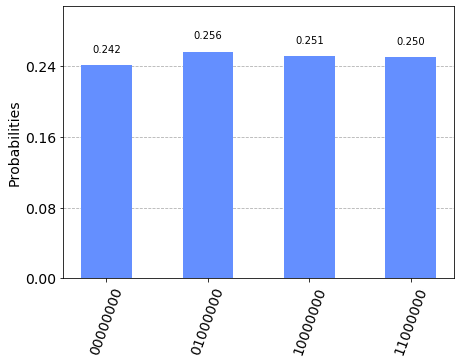

In [6]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [7]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2) 
    phase = decimal/(2**n_count)
    measured_phases.append(phase)
    
    rows.append(["%s = %i" % (output, decimal), 
                 "%i/%i = %.2f" % (decimal, 2**n_count, phase)])

headers=["Register", "Eigenwert"]
df = pd.DataFrame(rows, columns=headers)
print(df)

         Register       Eigenwert
0    00000000 = 0    0/256 = 0.00
1   01000000 = 64   64/256 = 0.25
2  10000000 = 128  128/256 = 0.50
3  11000000 = 192  192/256 = 0.75


In [8]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])
    
headers=["Eigenwert", "Bruch", "Mögliches r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Eigenwert Bruch  Mögliches r
0       0.00   0/1            1
1       0.25   1/4            4
2       0.50   1/2            2
3       0.75   3/4            4


Wir sehen nun also, dass wir mit einer Wahrscheinlichkeit von $\frac{1}{2}$ die Ordnung $r = 4$ berechnet haben. Um genauere Ergebnisse zu erzielen könnten wir zum Beispiel die Anzahl der "Shots" innerhalb der Simulation erhöhen oder mehr Qubits verwenden

In [9]:
pow(7, 4) % 15

1

Die berechnete Ordnung ist also richtig

Es ist zu beachten, dass das Experiment (bzw. der Shors Algorithmus) einen Teil seiner Berechnungen auf klassische Weise durchführt. Dies ist die Extrahierung des Nenners aus dem Eigenwert, der durch die Python-Builtin *Fraction().limit_denominator(15)* berechnet wird. \
Diese Methodik trifft auf die meisten Quantenalgorithmen zu, wobei immer ein Teil der Berechnungen von einem klassischen Algorithmus durchgeführt werden.

## Der Shors's Algorithmus und das Diskrete Logarithmus Problem

Bisher löst der Shor's Algorithmus lediglich das "Order-Finding-Problem". Im Folgenden wird nun erklärt, wie die Lösung dieses Problems auf die Lösung des Diskreten Logarithmus Problems(DLP) angewendet werden kann.

Das DLP lautet wie folgt: 
Gegeben sei eine zyklische Gruppe $G$, deren Generatorelement $g \in G$, sowie ein weiteres Element $x \in G$. Finde eine Ganzzahl $r$, sodass gilt: $$x = g^r \in G$$

Definieren wir nun eine Funktion $f(a, b)$, die auf Elemente der Gruppe $G$ angewendet wird. Die Gruppenstruktur muss dabei erhalten bleiben. $f(a, b)$ ist also ein Gruppenhomomorphismus.
$$f(a, b) = g^ax^{-b}$$ 
Klar ist, dass der Kern der Funktion $f$ (also die Element der Gruppe, die durch $f$ auf das Identitätselement $1$ abgebildet werden) aus Elementen folgender Form besteht: $$(a*r, 1) \ ; \ a \in \mathbb{N}$$
Da $f$ eine periodische Funktion ist, kann der Shor's Algorithmus die zu Elementen des Kerns gehörende Paramter $a,b$ beschleunigt berechnen und damit schließlich den Kern $r$ berechnen _[1]_.

Die übertragene Methode zur Berechnung des DLP auf elliptischen Kurven wurde bereits in der Arbeit "QrTOR - Modernes quantenresistentes Onion Routing" besprochen

## Referenzen
_[1]_ Quantum Computation and Quantum Information; Nielsen Michael, Chuang Isaac; 2010 Cambridge University Press\
_[2]_ Qiskit Textbook; Abraham Asfaw, Luciano Bello, Yael Ben-Haim, Sergey Bravyi, Nicholas Bronn, Lauren Capelluto, Almudena Carrera Vazquez, Jack Ceroni, Richard Chen, Albert Frisch, Jay Gambetta, Shelly Garion, Leron Gil, Salvador De La Puente Gonzalez, Francis Harkins, Takashi Imamichi, Hwajung Kang, Amir h. Karamlou, David McKay, Antonio Mezzacapo, Zlatko Minev, Ramis Movassagh, Giacomo Nannicni, Paul Nation, Anna Phan, Marco Pistoia, Arthur Rattew, Joachim Schaefer, Javad Shabani, John Smolin, John Stenger, Kristan Temme, Madeleine Tod, Stephen Wood, James Wootton; 2020 IBM\
_[3]_ Quantenmechanik; Griffiths David; 2012 Pearson

***
&copy; 2021, Linus Meierhöfer